In [3]:
from importlib import reload
import sys
sys.path.append('..')
from LyaPlotter.module_picca import (cf1dPlotter, cfPlotter,Searcher,xcfPlotter, DeltasPlotter)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.rcParams.update({'font.size': 14})

In [4]:
deltas_path = '/global/cscratch1/sd/cramirez/reproduce_london/picca/picca_deltas/'
cf1d_path   = '/global/cscratch1/sd/cramirez/reproduce_london/picca/cf1d'
cf_path     = '/global/cscratch1/sd/cramirez/reproduce_london/picca/cf'
xcf_path     = '/global/cscratch1/sd/cramirez/reproduce_london/picca/xcf'

hack_xcf_path = '/global/cscratch1/sd/cramirez/Tucson-meeting/hack_dr14/Correlations/xcf_z_0_10-exp.fits.gz'
hack_cf_path = '/global/cscratch1/sd/cramirez/Tucson-meeting/hack_dr14/Correlations/cf_z_0_10-exp.fits.gz'

# Deltas Plotter

In [5]:
print('Searching for Deltas')
deltas_sims = {}
for i,path in enumerate(DeltasPlotter.search(deltas_path)):
    print(i,path)
    deltas_sims[i] = DeltasPlotter(path)

Searching for Deltas
0 /global/cscratch1/sd/cramirez/reproduce_london/picca/picca_deltas/simple2/Delta_LYA/Log/delta_attributes.fits.gz
1 /global/cscratch1/sd/cramirez/reproduce_london/picca/picca_deltas/full_example_2_nodes/Delta_LYA/Log/delta_attributes.fits.gz
2 /global/cscratch1/sd/cramirez/reproduce_london/picca/picca_deltas/lyacolore_sh_with_my_colore/Delta_LYA/Log/delta_attributes.fits.gz
3 /global/cscratch1/sd/cramirez/reproduce_london/picca/picca_deltas/2lpt_try_1/Delta_LYA/Log/delta_attributes.fits.gz


In [6]:
deltas_sims[0].get_data()
x = deltas_sims[0]

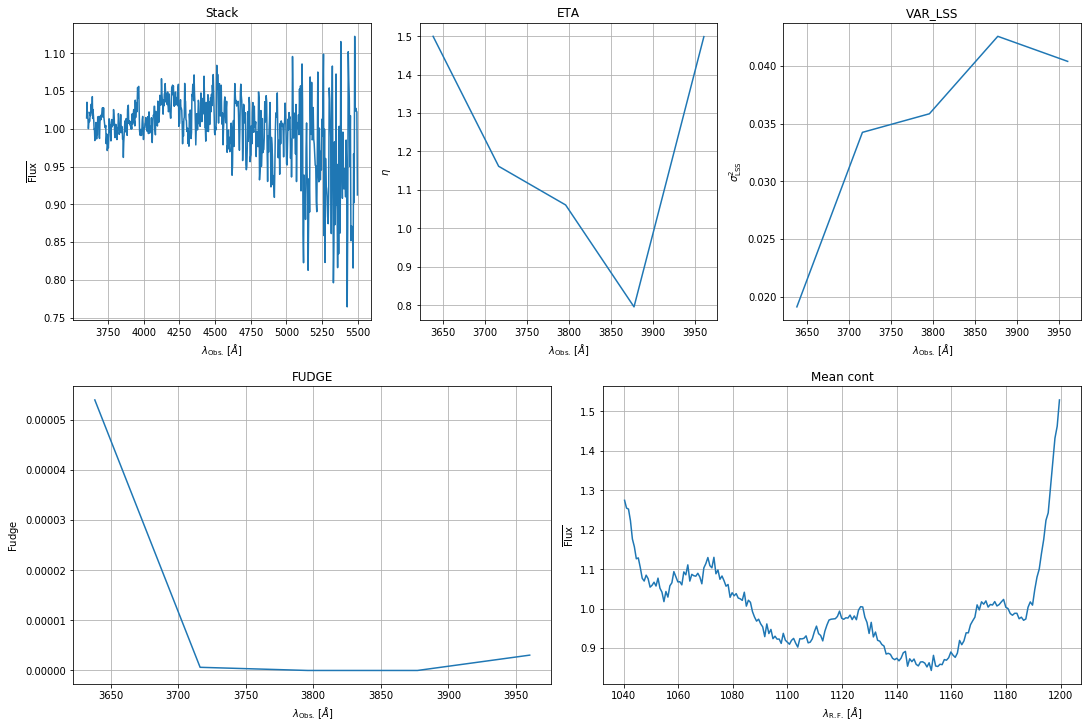

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(15,10))

gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, :2])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, -2:])
ax4 = fig.add_subplot(gs[1, :3])
ax5 = fig.add_subplot(gs[1, 3:])

x.plot_stack(ax=ax1)
ax1.set_title('Stack')
x.plot_eta(ax=ax2)
ax2.set_title('ETA')
x.plot_var_lss(ax=ax3)
ax3.set_title('VAR_LSS')
x.plot_fudge(ax=ax4)
ax4.set_title('FUDGE')
x.plot_mean_cont(ax=ax5)
ax5.set_title('Mean cont')
plt.show()

# 1 dim correlation function

In [8]:
print('Searching for 1 dim. correlation function')
cf1d_sims = {}
for i,path in enumerate(cf1dPlotter.search(cf1d_path)):
    print(i,path)
    cf1d_sims[i] = cf1dPlotter(path)

Searching for 1 dim. correlation function
0 /global/cscratch1/sd/cramirez/reproduce_london/picca/cf1d/simple2/Correlations/cf.fits.gz
1 /global/cscratch1/sd/cramirez/reproduce_london/picca/cf1d/full_example_2_nodes/Correlations/cf.fits.gz
2 /global/cscratch1/sd/cramirez/reproduce_london/picca/cf1d/2lpt_try_1_20200515082500/Correlations/cf.fits.gz


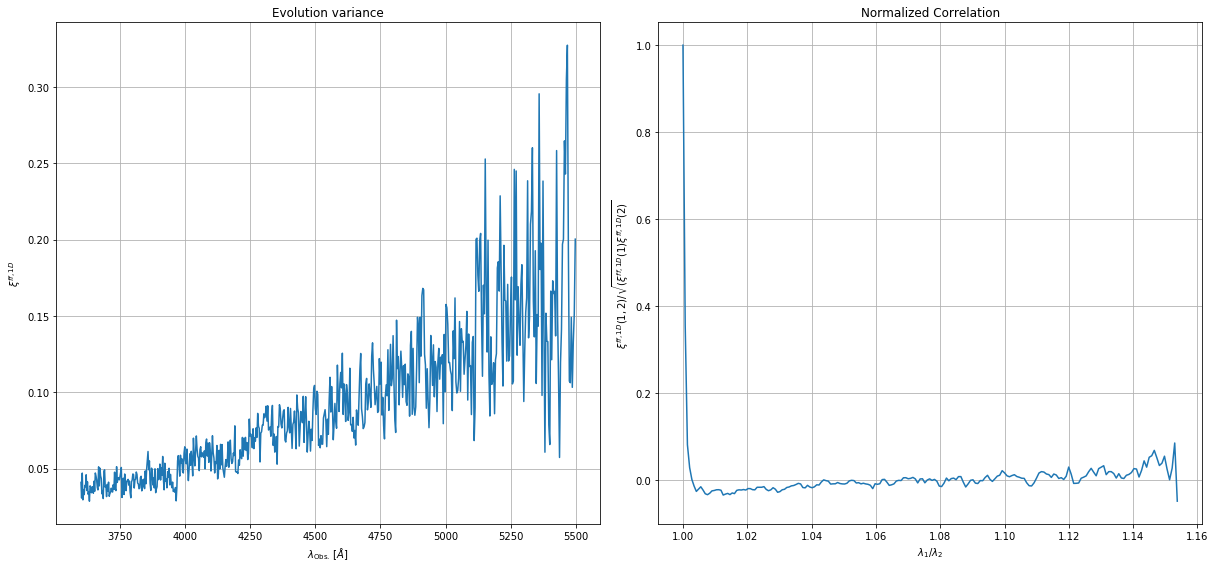

In [9]:
fig, axs = plt.subplots(1,2, figsize=(17,8))
ax1, ax2 = axs
cf1d_sims[0].evolution_variance(ax= ax1)
ax1.set_title('Evolution variance')
cf1d_sims[0].normalized_correlation(ax=ax2)
ax2.set_title('Normalized Correlation')
ax2.set_ylabel(r'$\xi^{ff,1D}(1,2) / \sqrt{(\xi^{ff,1D}(1)\xi^{ff,1D}(2)}$')
plt.tight_layout()
plt.show()

# 3 dim correlation function

In [10]:
print('Searching for 3 dim. correlation function')
cf_sims = {}
for i,path in enumerate(cfPlotter.search(cf_path)):
    print(i,path)
    cf_sims[i] = cfPlotter(path)

Searching for 3 dim. correlation function
0 /global/cscratch1/sd/cramirez/reproduce_london/picca/cf/simple2/Correlations/e_cf.fits.gz
1 /global/cscratch1/sd/cramirez/reproduce_london/picca/cf/full_example_2_nodes/Correlations/e_cf.fits.gz
2 /global/cscratch1/sd/cramirez/reproduce_london/picca/cf/lyacolore_sh_with_my_colore/Correlations/e_cf.fits.gz
3 /global/cscratch1/sd/cramirez/reproduce_london/picca/cf/2lpt_try_1/Correlations/e_cf.fits.gz


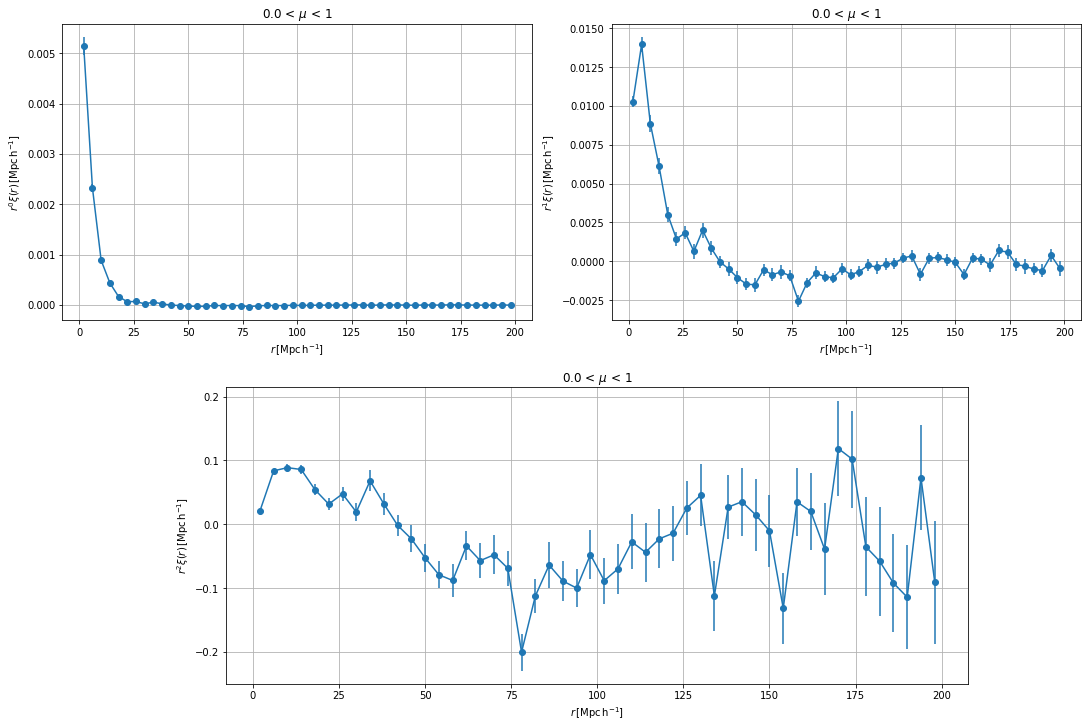

In [11]:
x = cf_sims[1]
fig = plt.figure(constrained_layout=True, figsize=(15,10))

gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[0, 3:])
ax3 = fig.add_subplot(gs[1, 1:5])


x.plot(rfactor=0, ax=ax1, title=True, marker='o')
x.plot(rfactor=1, ax=ax2, title=True, marker='o')
x.plot(rfactor=2, ax=ax3, title=True, marker='o')
plt.show()

In [12]:
print('Searching for 3 dmin Lya-QSO corrrelation function')
xcf_sims = {}
for i,path in enumerate(xcfPlotter.search(xcf_path)):
    print(i,path)
    xcf_sims[i] = xcfPlotter(path)

Searching for 3 dmin Lya-QSO corrrelation function
0 /global/cscratch1/sd/cramirez/reproduce_london/picca/xcf/simple2/Correlations/e_xcf.fits.gz
1 /global/cscratch1/sd/cramirez/reproduce_london/picca/xcf/full_example_2_nodes/Correlations/e_xcf.fits.gz
2 /global/cscratch1/sd/cramirez/reproduce_london/picca/xcf/lyacolore_sh_with_my_colore/Correlations/e_xcf.fits.gz
3 /global/cscratch1/sd/cramirez/reproduce_london/picca/xcf/2lpt_try_1/Correlations/e_xcf.fits.gz


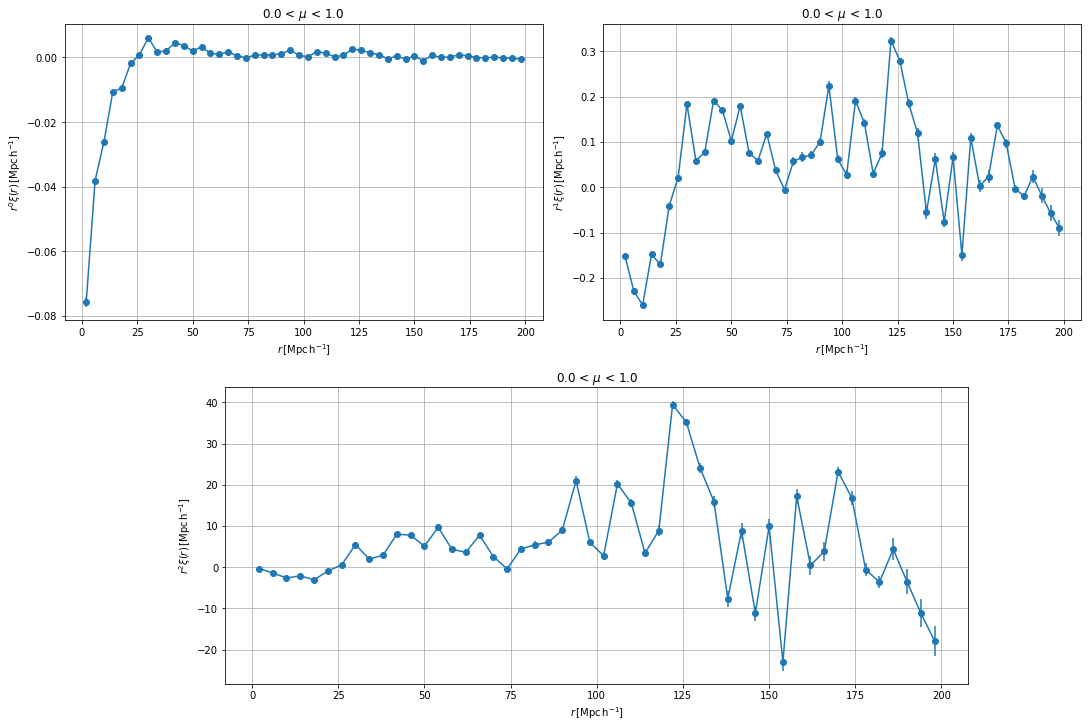

In [13]:
x = xcf_sims[2]
fig = plt.figure(constrained_layout=True, figsize=(15,10))

gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[0, 3:])
ax3 = fig.add_subplot(gs[1, 1:5])


x.plot(rfactor=0, ax=ax1, title=True, marker='o')
x.plot(rfactor=1, ax=ax2, title=True, marker='o')
x.plot(rfactor=2, ax=ax3, title=True, marker='o')
plt.show()